<a href="https://colab.research.google.com/github/CalculatedContent/ww-phys_theory/blob/master/Full_Test_Jacobians_Resnets_SVD_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook for generating Full Jacobian SVD over the test data for ResNet data

Can do the full calculation, and a batched (slow, but handles large memory cases)

Can handle: ResnetXXX with CIFAR10, CIFAR100, SVHN

i.e. CIFAR 10
```
 resnet20_cifar10
 resnet56_cifar10
 resnet110_cifar10
 resnet164bn_cifar10
 resnet272bn_cifar10

full_jacobian()


 resnet542bn_cifar10
 resnet1001_cifar10
 resnet1202_cifar10

full_batched_jacobian()

```






In [58]:
Jdir =  '/content/drive/My Drive/J_resnets_fullsvd'

modelnames = ['resnet20_cifar100', 'resnet56_cifar100', 'resnet110_cifar100', 'resnet164bn_cifar100', 'resnet272bn_cifar100', 'resnet542bn_cifar100']
num_classes = 100


modelnames = ['resnet20_cifar10', 'resnet56_cifar10', 'resnet110_cifar10', 'resnet164bn_cifar10', 
              'resnet272bn_cifar10', 'resnet542bn_cifar10','resnet1001_cifar10', 'resnet1202_cifar10']
num_classes = 10




num_data = 10000

batched = True
start_batch = 0
batch_size = 100

device = 'cuda:0'


time: 6.65 ms


In [28]:
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
time: 2.51 s


In [29]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.31 s


In [30]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.05 ms


In [31]:
!pip install pytorchcv
!pip install powerlaw
!pip install GPUtil
import GPUtil

time: 7.19 s


In [32]:
!import os
import time

import numpy as np
import pandas as pd
import scipy.stats as stats

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Subset

from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt
from PIL import Image

import math
import copy

import gc


import matplotlib.pyplot as plt


/bin/bash: import: command not found
time: 880 ms


### Run InstallPhysTheory notebook 

In [33]:
import sys
sys.path.append("/content/drive/My Drive/Jacobian")
import jacobian as jac
import utils

time: 1.67 ms


In [34]:
import pytorchcv
from pytorchcv.model_provider import get_model as ptcv_get_model

time: 1.31 ms


### Compute JJ, in batches or all at once


In [35]:
def get_datasets(thismodel, batch_size):
  print("getting dataset for ", thismodel)
  if thismodel.endswith('cifar100'):
    print("loading cifar100")
    train_dataset = datasets.CIFAR100(
      root='data', 
      train=True, 
      transform=transforms.ToTensor(),
      download=True)
    test_dataset = datasets.CIFAR100(
      root='data', 
      train=False, 
      transform=transforms.ToTensor(),
      download=True) 
 
    train_loader = DataLoader(
      dataset=train_dataset, 
      batch_size=batch_size,
      num_workers=4,
      shuffle=False)
    test_loader = DataLoader(
      dataset=test_dataset, 
      batch_size=batch_size,
      num_workers=4,
      shuffle=False)

  else:
    print("loading cifar10")
    train_dataset, test_dataset, train_loader, test_loader = utils.get_data(batch_size=batch_size)

      
  return train_dataset, test_dataset, train_loader, test_loader

time: 9.07 ms


In [36]:
train_dataset, test_dataset, train_loader, test_loader = get_datasets(modelnames[0], batch_size)#utils.get_data(batch_size=batch_size)
#train_dataset, test_dataset, train_loader, test_loader = utils.get_data(batch_size=batch_size)

print(test_dataset)


getting dataset for  resnet542bn_cifar10
loading cifar10
Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.4913725490196078, 0.4823529411764706, 0.4466666666666667], std=[0.24705882352941178, 0.24352941176470588, 0.2615686274509804])
           )
time: 2.26 s


### Hook for model eval later

In [37]:
#model = ptcv_get_model(thismodel, pretrained=True)  

time: 706 µs


In [38]:
##3 TODO: check that files names are correctly ordered
def read_batched_JJMat(modelname, verbose=False):

  if verbose:
    print("Reading batched JJBlocks for ", modelname)
    
  JJMat = None
  import os, glob
  os.chdir(Jdir)
  for filename in glob.glob("Jfull_{}__*.csv".format(modelname)):
    if verbose:
      print(filename) 

    JJBlock = np.loadtxt(filename)
    JJMat = np.vstack([JJMat, JJBlock]) if JJMat is not None else JJBlock

  return JJMat

time: 4.41 ms


In [55]:
#for modelname in modelnames:
#  print(modelname)
#  JJMat = read_batched_JJMat(modelname, verbose=False)
#  filename = "{}/JJMat_{}".format(Jdir, modelname)
#  print(filename)
#  np.save(filename, JJMat)

  #filename = "{}/JJMat_{}.npy".format(Jdir, modelname)
  #JJMat = np.load(filename)
  #print(type(JJMat))

resnet20_cifar100
/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet20_cifar100
resnet56_cifar100
/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet56_cifar100
resnet110_cifar100
/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet110_cifar100
resnet164bn_cifar100
/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet164bn_cifar100
resnet272bn_cifar100
/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet272bn_cifar100
resnet542bn_cifar100
/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet542bn_cifar100
time: 13min 32s


In [57]:
!ls  "$Jdir"/JJMat_resnet*npy

'/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet1001_cifar10.npy'
'/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet110_cifar100.npy'
'/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet110_cifar10.npy'
'/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet1202_cifar10.npy'
'/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet164bn_cifar100.npy'
'/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet164bn_cifar10.npy'
'/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet20_cifar100.npy'
'/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet20_cifar10.npy'
'/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet272bn_cifar100.npy'
'/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet272bn_cifar10.npy'
'/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet542bn_cifar100.npy'
'/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet542bn_cifar10.npy'
'/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet56_cifar100.npy'
'/content/drive/My Drive/J_resnets_fullsvd/JJMa

resnet20_cifar10
/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet20_cifar10.npy


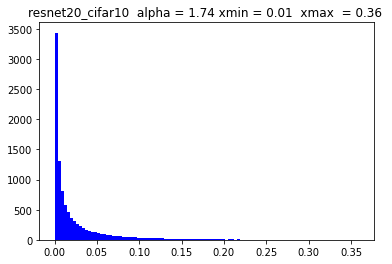

1.742879188578955 0.12545545314889894 0.35953683


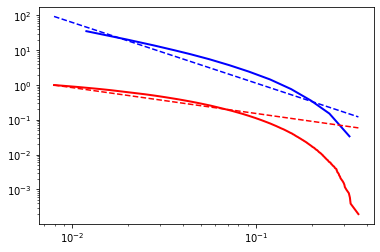

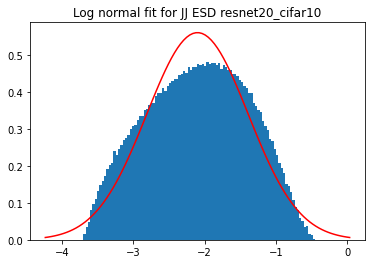

resnet56_cifar10
/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet56_cifar10.npy


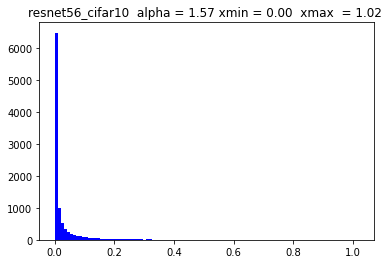

1.5717898670551091 0.10762763259023406 1.0199627


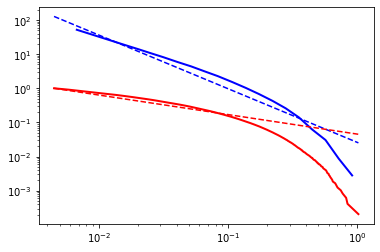

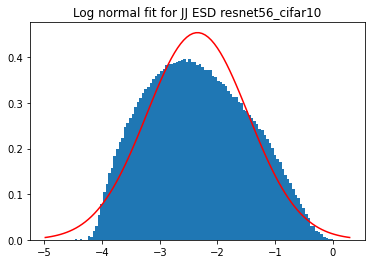

resnet110_cifar10
/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet110_cifar10.npy


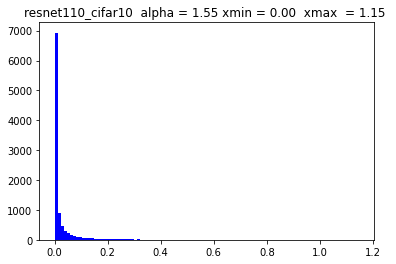

1.5530779690438157 0.1013038463508068 1.1466725


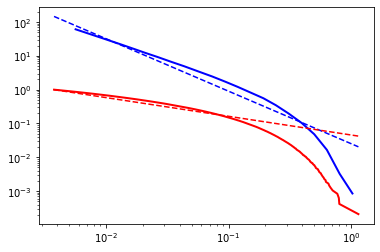

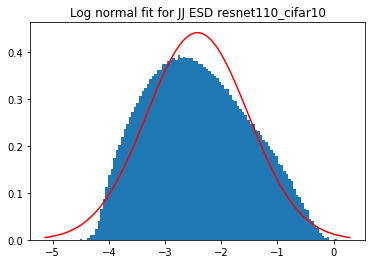

resnet164bn_cifar10
/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet164bn_cifar10.npy


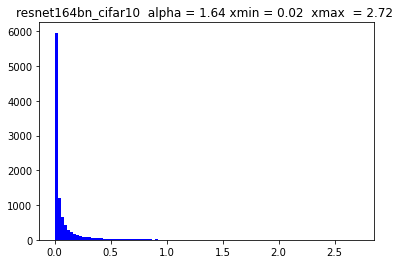

1.6368776554114914 0.10889923898830756 2.7167497


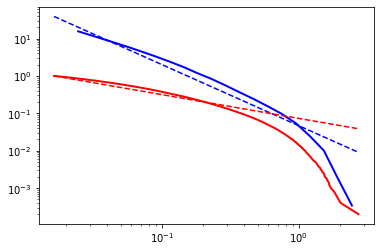

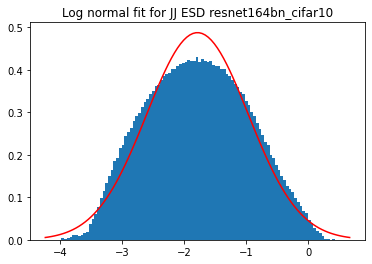

resnet272bn_cifar10
/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet272bn_cifar10.npy


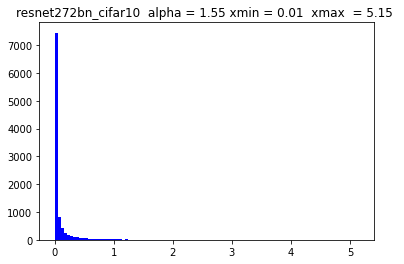

1.5509712137895617 0.09574063485809003 5.1490784


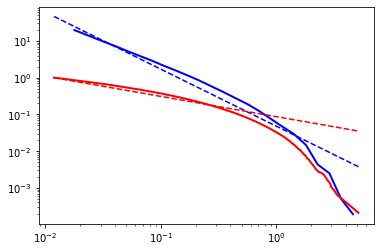

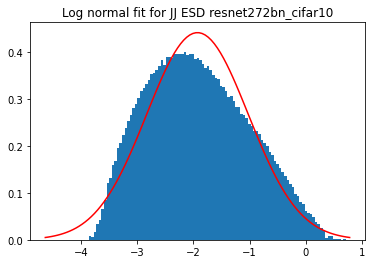

resnet542bn_cifar10
/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet542bn_cifar10.npy


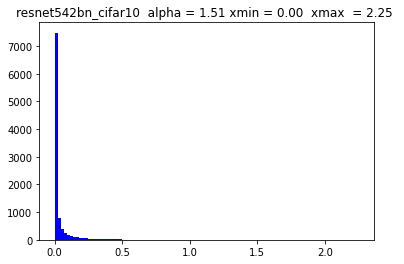

1.5053332316923376 0.10829138929605003 2.2531867046080394


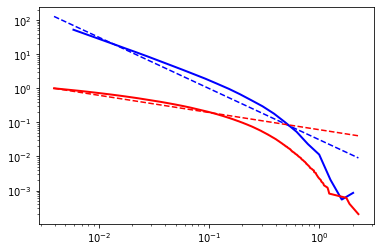

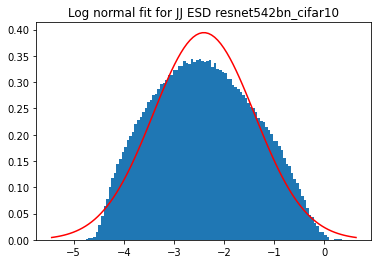

resnet1001_cifar10
/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet1001_cifar10.npy


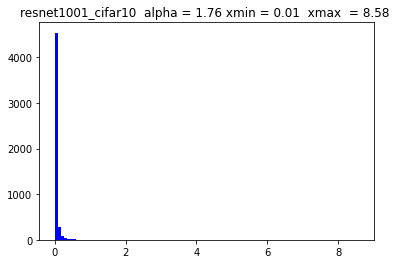

1.755990233145604 0.09104793508306647 8.5776078545899


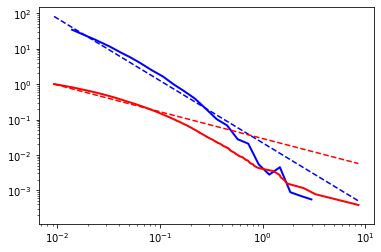

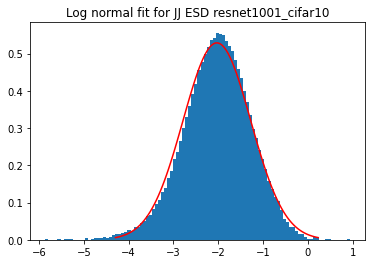

resnet1202_cifar10
/content/drive/My Drive/J_resnets_fullsvd/JJMat_resnet1202_cifar10.npy


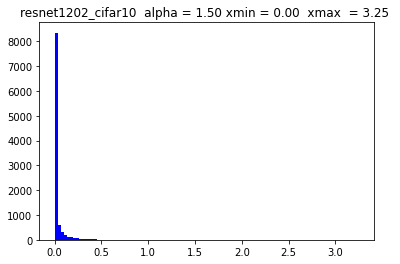

1.5039222411640938 0.09229743801028922 3.2518479038625303


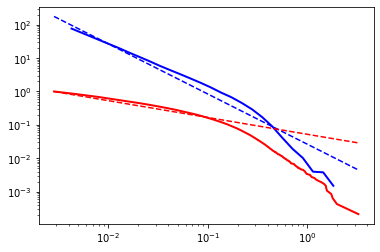

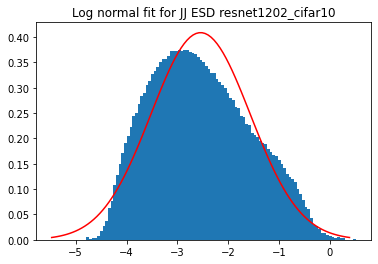

time: 18min


In [60]:
import powerlaw

norm = (num_classes*3*32*32)

alphas = []
tail_alphas = []
max_evals = []
variances = []
JJnorms = []

for modelname in modelnames:
  print(modelname)
  filename = "{}/JJMat_{}.npy".format(Jdir, modelname)
  print(filename)
  JJMat = np.load(filename)

  JJMat =  (1.0/ norm)*JJMat
  JJnorms.append(np.linalg.norm(JJMat))

  norm = num_classes*3*32*32
  evals = np.linalg.eigh(JJMat)[0]   #LAPAK routine

  data = evals[evals > 0.0]
  logdata = np.log10(data)
  mu = np.mean(logdata)
  var = np.var(logdata)
  sigma = np.sqrt(var)

  xmin = 10**mu 

  fit = powerlaw.Fit(data, xmin=xmin)
  alpha = fit.alpha
  D = fit.D
  max_eval = np.max(evals)

  plt.hist(data, bins=100, color='b')
  plt.title("{}  alpha = {:0.2f} xmin = {:0.2f}  xmax  = {:0.2f} ".format(modelname, alpha, xmin, max_eval))
  plt.show()

  print(alpha, D, max_eval)
  alphas.append(alpha)
  max_evals.append(max_eval)
  variances.append(var)

  fig2 = fit.plot_pdf(color='b', linewidth=2)
  fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
  fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
  fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)
  plt.show()


  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
  plt.plot(x, stats.norm.pdf(x, mu, sigma), color='r')

  plt.hist(logdata, bins=100, density=True);
  plt.title("Log normal fit for JJ ESD {}".format(modelname))
  plt.show()

  #fit = powerlaw.Fit(data, xmax=np.max(evals))
  #print("tail alpha = {:0.2f}".format(fit.alpha))
  #tail_alphas.append(fit.alpha)
  


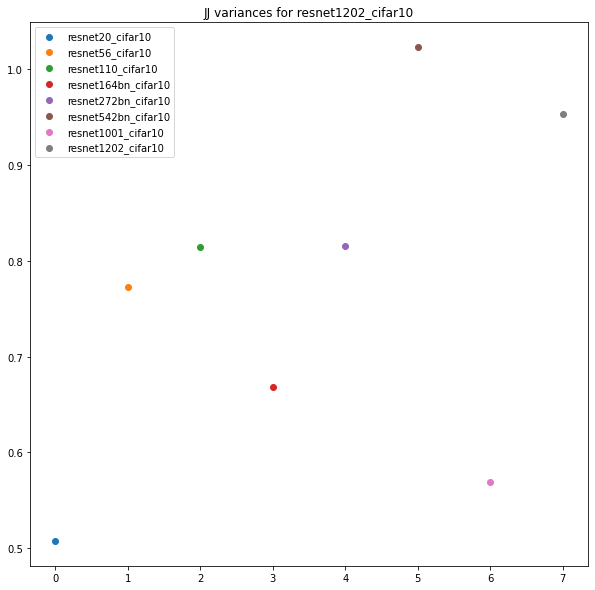

time: 241 ms


In [61]:
plt.figure(figsize=(10,10))
for im, modelname in enumerate(modelnames):
  plt.scatter(im, variances[im], label=modelname)
plt.title("JJ variances for {}".format(modelname))
plt.legend()
plt.show()

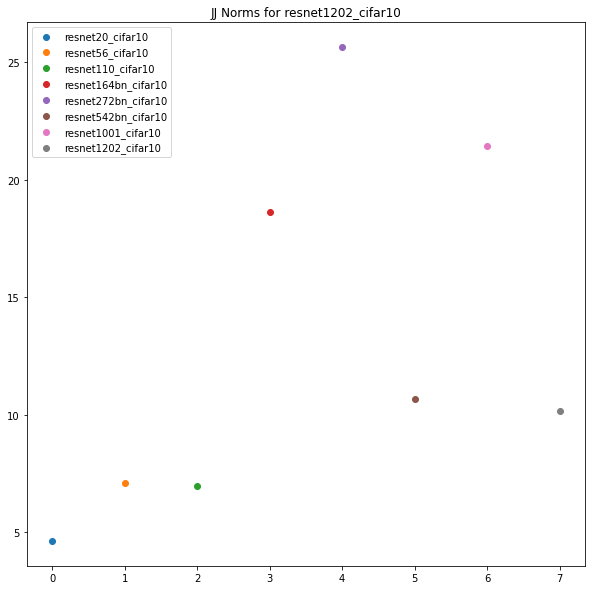

time: 242 ms


In [62]:
plt.figure(figsize=(10,10))
for im, modelname in enumerate(modelnames):
  plt.scatter(im, JJnorms[im], label=modelname)
plt.title("JJ Norms for {}".format(modelname))
plt.legend()
plt.show()

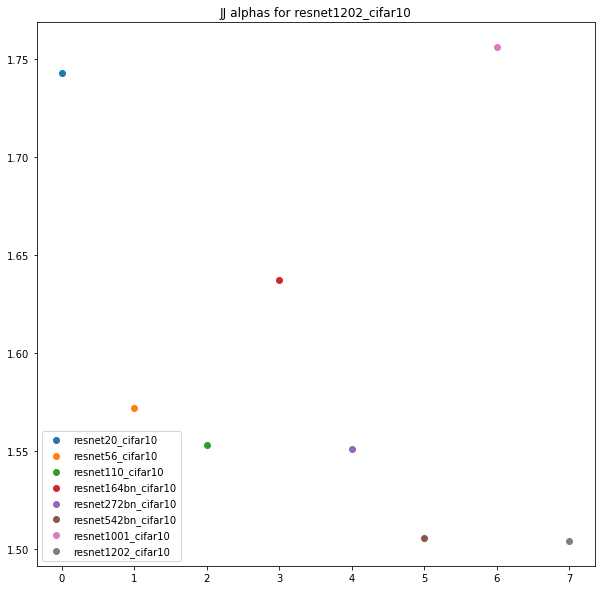

time: 240 ms


In [75]:
plt.figure(figsize=(10,10))
for im, modelname in enumerate(modelnames):
    plt.scatter(im, alphas[im], label=modelname)
plt.title(modelname)
plt.title("JJ alphas for {}".format(modelname))
plt.legend()
plt.show()

In [64]:
xmin

0.002850912011738275

time: 2.57 ms


resnet20_cifar10
1.5485380536049682 0.23966370348681662


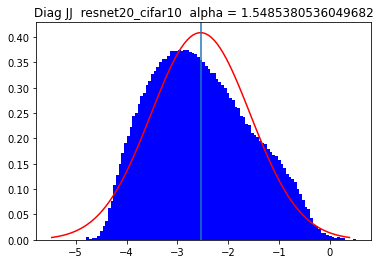

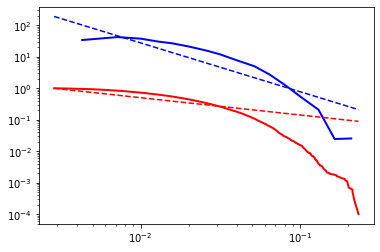

resnet56_cifar10
1.5889709594912902 0.11144529916829571


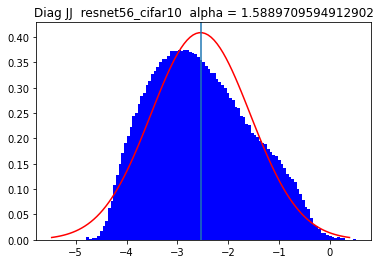

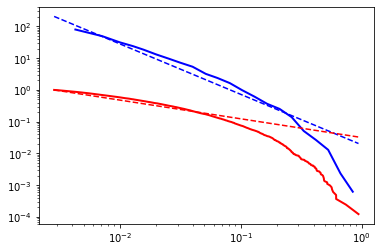

resnet110_cifar10
1.5940697089899407 0.11522542761175908


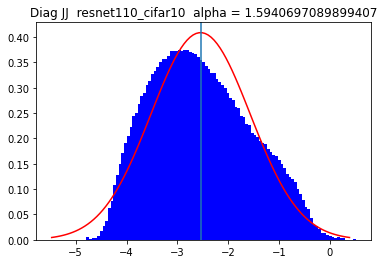

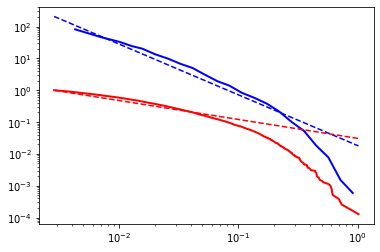

resnet164bn_cifar10
1.3800542464416945 0.2570257408518618


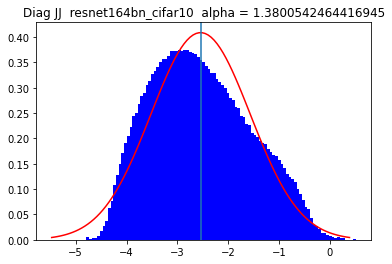

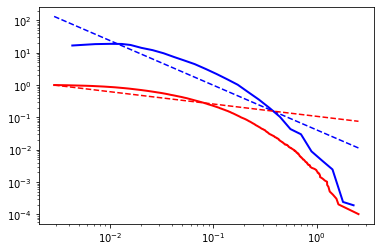

resnet272bn_cifar10
1.4236448578995535 0.14376418378941824


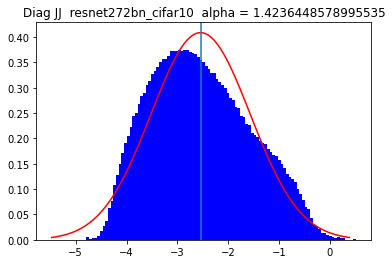

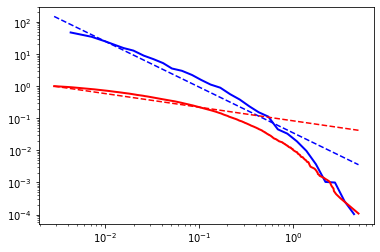

resnet542bn_cifar10
1.5412970737123837 0.11707419004266018


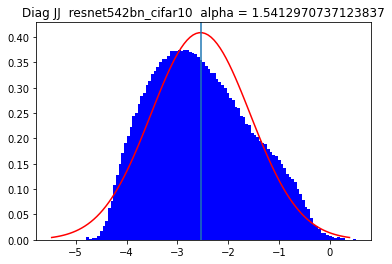

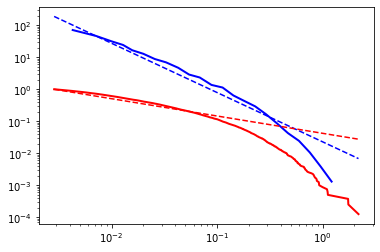

resnet1001_cifar10
2.7942109020679293 0.1676771932125236


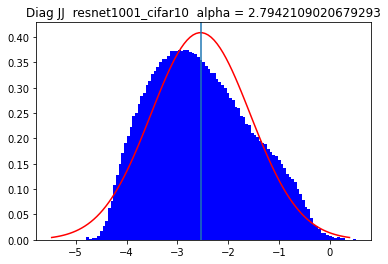

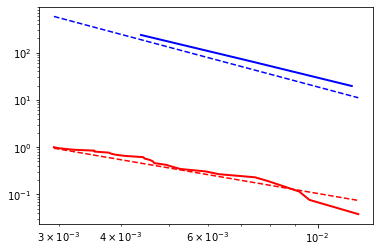

resnet1202_cifar10
1.5783509271118157 0.09695496348935428


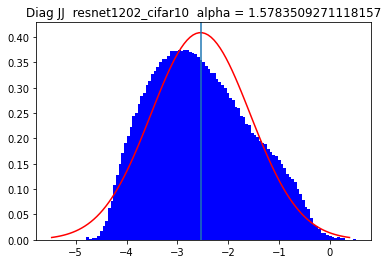

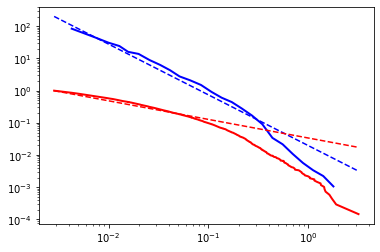

time: 16 s


In [65]:
diag_alphas = []

for modelname in modelnames:
  print(modelname)
  filename = "{}/JJMat_{}.npy".format(Jdir, modelname)
  JJMat = np.load(filename)
  JJMat =  (1.0/ norm)*JJMat

  JJDiag = np.diag(JJMat)
  data = JJDiag[JJDiag > 0.0]
  mu = np.mean(logdata)
  var = np.var(logdata)
  sigma = np.sqrt(var)

  xmin = 10**mu
  fit = powerlaw.Fit(data, xmin=xmin)

  alpha = fit.alpha
  D = fit.D
  diag_alphas.append(alpha)
  print(alpha, D)

  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
  plt.plot(x, stats.norm.pdf(x, mu, sigma), color='r')

  plt.hist(logdata, bins=100, color='b', density=True)
  plt.axvline(x=mu)
  plt.title("Diag JJ  {}  alpha = {}".format(modelname,alpha))
  plt.show()

  fig2 = fit.plot_pdf(color='b', linewidth=2)
  fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
  fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
  fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)
  plt.show()

  

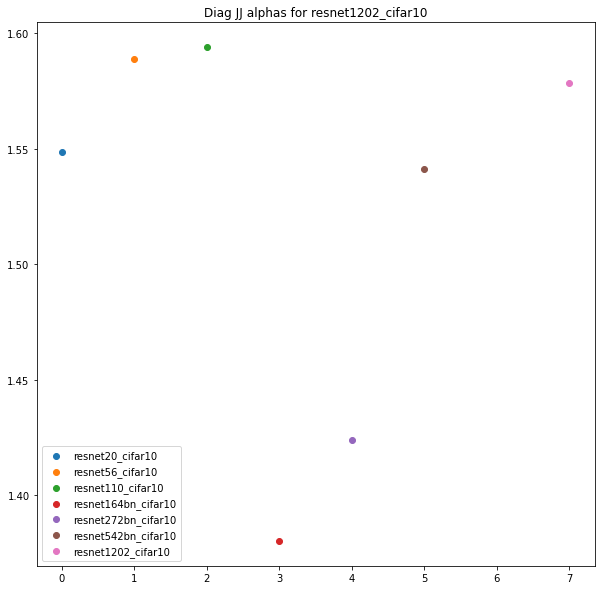

time: 242 ms


In [72]:
plt.figure(figsize=(10,10))
for im, modelname in enumerate(modelnames):
  if im !=6:
    plt.scatter(im, diag_alphas[im], label=modelname)
plt.title(modelname)
plt.title("Diag JJ alphas for {}".format(modelname))
plt.legend()
plt.show()